In [1]:
import os
os.chdir('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Loan Prediction')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Loan Prediction/Data/train.csv')

In [4]:
train.shape


(614, 13)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test=pd.read_csv('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Loan Prediction/Data/test.csv')

In [7]:
test.shape

(367, 12)

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

***Data Cleaning is one of the most important component before analyzing the data. Data cleansing or data cleaning is the process of identifying and removing (or correcting) inaccurate records from a dataset, table, or database and refers to recognising unfinished, unreliable, inaccurate or non-relevant parts of the data and then restoring, remodelling, or removing the dirty or crude data.***
Steps for data cleaning including:
1. Fixing up formats
2. Filling in missing values
3. Removing Outliers

In [10]:
# Understanding data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
# Find number of missing values
print('Percentage of missing values : \n {}'.format((train.isna().sum()/len(train.Loan_ID))*100))

Percentage of missing values : 
 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


***There are multiple ways of imputing values. Since, percentage of missing values is less, we will do following***:
1. Fill Categorical variables with mode
2. Fill numerical variables with mean

In [12]:
train.Gender=train.Gender.fillna(train.Gender.mode())

In [13]:
train.Married=train.Married.fillna(train.Married.mode())

In [14]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
train.Dependents=train.Dependents.fillna(train.Dependents.fillna(0))
test.Dependents=test.Dependents.fillna(test.Dependents.fillna(0))

In [16]:
train.Self_Employed=train.Self_Employed.fillna(train.Self_Employed.mode())

In [17]:
train.LoanAmount=train.LoanAmount.astype(float)
test.LoanAmount=test.LoanAmount.astype(float)

In [18]:
train.LoanAmount=train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount=test.LoanAmount.fillna(test.LoanAmount.mean())

In [19]:
train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())

In [21]:
train.Credit_History=train.Credit_History.fillna(0)
test.Credit_History=test.Credit_History.fillna(0)

In [22]:
train.Gender=train.Gender.fillna('Male')
test.Gender=train.Gender.fillna('Male')

In [23]:
train.Self_Employed=train.Self_Employed.fillna('No')
test.Self_Employed=test.Self_Employed.fillna('No')

In [24]:
train.Married=train.Married.fillna('No')
test.Married=test.Married.fillna('No')

In [25]:
train.isna().sum().sum()

0

In [26]:
test.isna().sum().sum()

0

In [27]:
train.to_csv('clean_train.csv')
test.to_csv('clean_test.csv')

***We have cleaned the data by removing missing values. Now, we will identify outliers in numerical columns.***

In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


{'boxes': [<matplotlib.lines.Line2D at 0x16dfe537fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x16dfe543b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x16dfe5537f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16dfe553390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16dfe543198>,
  <matplotlib.lines.Line2D at 0x16dfe5436d8>]}

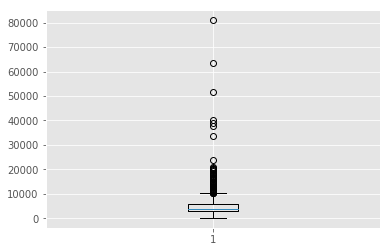

In [29]:
plt.boxplot(train.ApplicantIncome)

In [30]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [31]:
#Removing Outliers. Build function for detecting outliers
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [32]:
l,u=outlier_treatment(train.ApplicantIncome)
l_test,u_test=outlier_treatment(test.ApplicantIncome)

In [33]:
train.drop(train[ (train.ApplicantIncome > u) | (train.ApplicantIncome < l) ].index , inplace=True)

In [34]:
test.drop(test[ (test.ApplicantIncome > u_test) | (test.ApplicantIncome < l_test) ].index , inplace=True)

In [35]:
train.shape

(564, 13)

{'boxes': [<matplotlib.lines.Line2D at 0x16dfe5deb00>],
 'caps': [<matplotlib.lines.Line2D at 0x16dfe5e5630>,
 'fliers': [<matplotlib.lines.Line2D at 0x16dfe5ee390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16dfe5e5ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16dfe5dec50>,
  <matplotlib.lines.Line2D at 0x16dfe5e51d0>]}

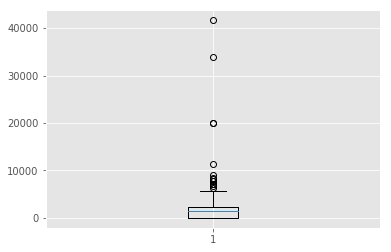

In [36]:
plt.boxplot(train.CoapplicantIncome)

In [37]:
train.CoapplicantIncome.describe()

count      564.000000
mean      1692.294184
std       2979.232330
min          0.000000
25%          0.000000
50%       1405.500000
75%       2337.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [38]:
l_co,u_co=outlier_treatment(train.CoapplicantIncome)

In [39]:
train.drop(train[ (train.CoapplicantIncome > u_co) | (train.CoapplicantIncome < l_co) ].index , inplace=True)

In [40]:
l_co_test,u_co_test=outlier_treatment(test.CoapplicantIncome)
test.drop(test[ (test.CoapplicantIncome > u_co_test) | (test.CoapplicantIncome < l_co_test) ].index , inplace=True)

In [41]:
train.shape

(548, 13)

In [42]:
train.to_csv('cleaned_train.csv')
test.to_csv('cleaned_test.csv')